In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
import datetime as dt
from scipy import stats


# Data Science Linkedin Project

In [9]:
# First Step, Import DataSet;
df_linkedin = pd.read_excel(
    '/Users/lucaslippman/Downloads/Linkedin last 365 days.xlsx')

**This is what the DataSet Looks like. It represents the last 365 days of linkedin posting. **

In [10]:
df_linkedin.head()

,Update title,Update link,Update type,Created date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate,Content Type
0,"""Diversity needs to come with inclusion. You m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/16/2021,All followers,1238,NaN,28,0.022617,19,0,1,NaN,0.038772,NaN
1,⭐️ Latitud Fellow Spotlight\n\nMeet Vinicius ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/18/2021,All followers,5686,NaN,287,0.050475,140,8,1,NaN,0.076680,NaN
2,📢 If you want more women to succeed as tech f...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/19/2021,All followers,6588,5.0,253,0.038403,77,12,5,NaN,0.052672,Video
3,Tips on how to hire an A+ tech team by Yuri Da...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/20/2021,All followers,2331,NaN,1041,0.446589,21,1,1,NaN,0.456456,NaN
4,“You need to have this ambition and this dream...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/23/2021,All followers,8199,NaN,267,0.032565,147,5,6,NaN,0.051836,NaN


To begin this, lets see a simple graph that displays how many likes we get on our posts

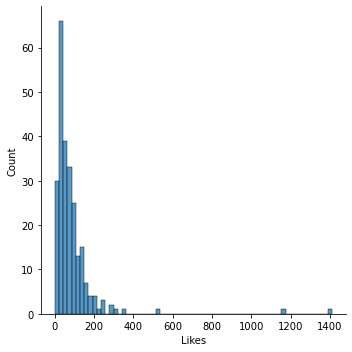

In [7]:
df_linkedin['Likes'].describe()
sns.displot(df_linkedin['Likes'])

Let us continue with a seaborn correlation heatmap. This will show us the variables most correlated to each other in this dataset

In [21]:
#First, lets delete all the vars that dont have data: Views and Follows
df_linkedin = df_linkedin.drop(columns =['Views','Follows'])


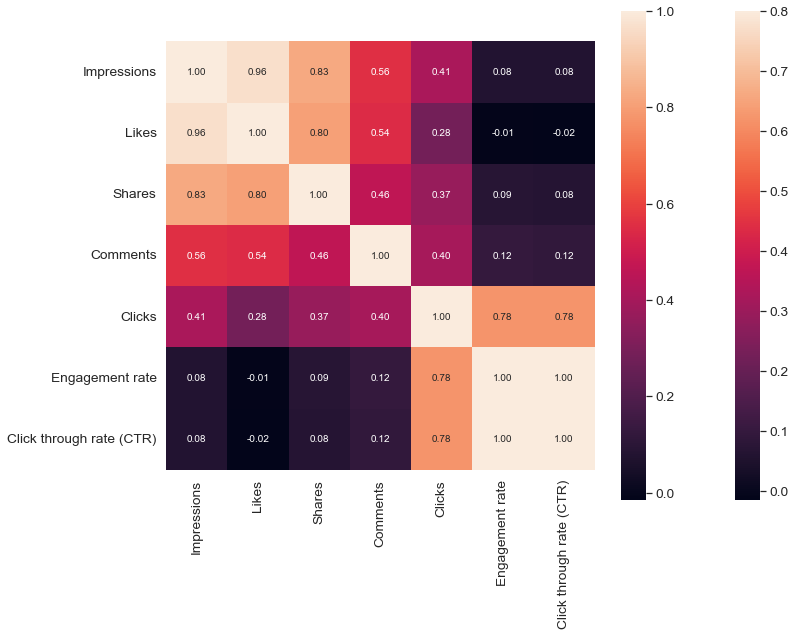

In [22]:
corrmat = df_linkedin.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Impressions')['Impressions'].index
cm = np.corrcoef(df_linkedin[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see here that likes and impressions are very correlated to each other, meaning that high impression posts will also have more likes according to our data. Shares also stands out as pretty important metric. Comments, on the other hand, seem to be lowly correlated to likes and impressions. Here is this info displayed in graph format

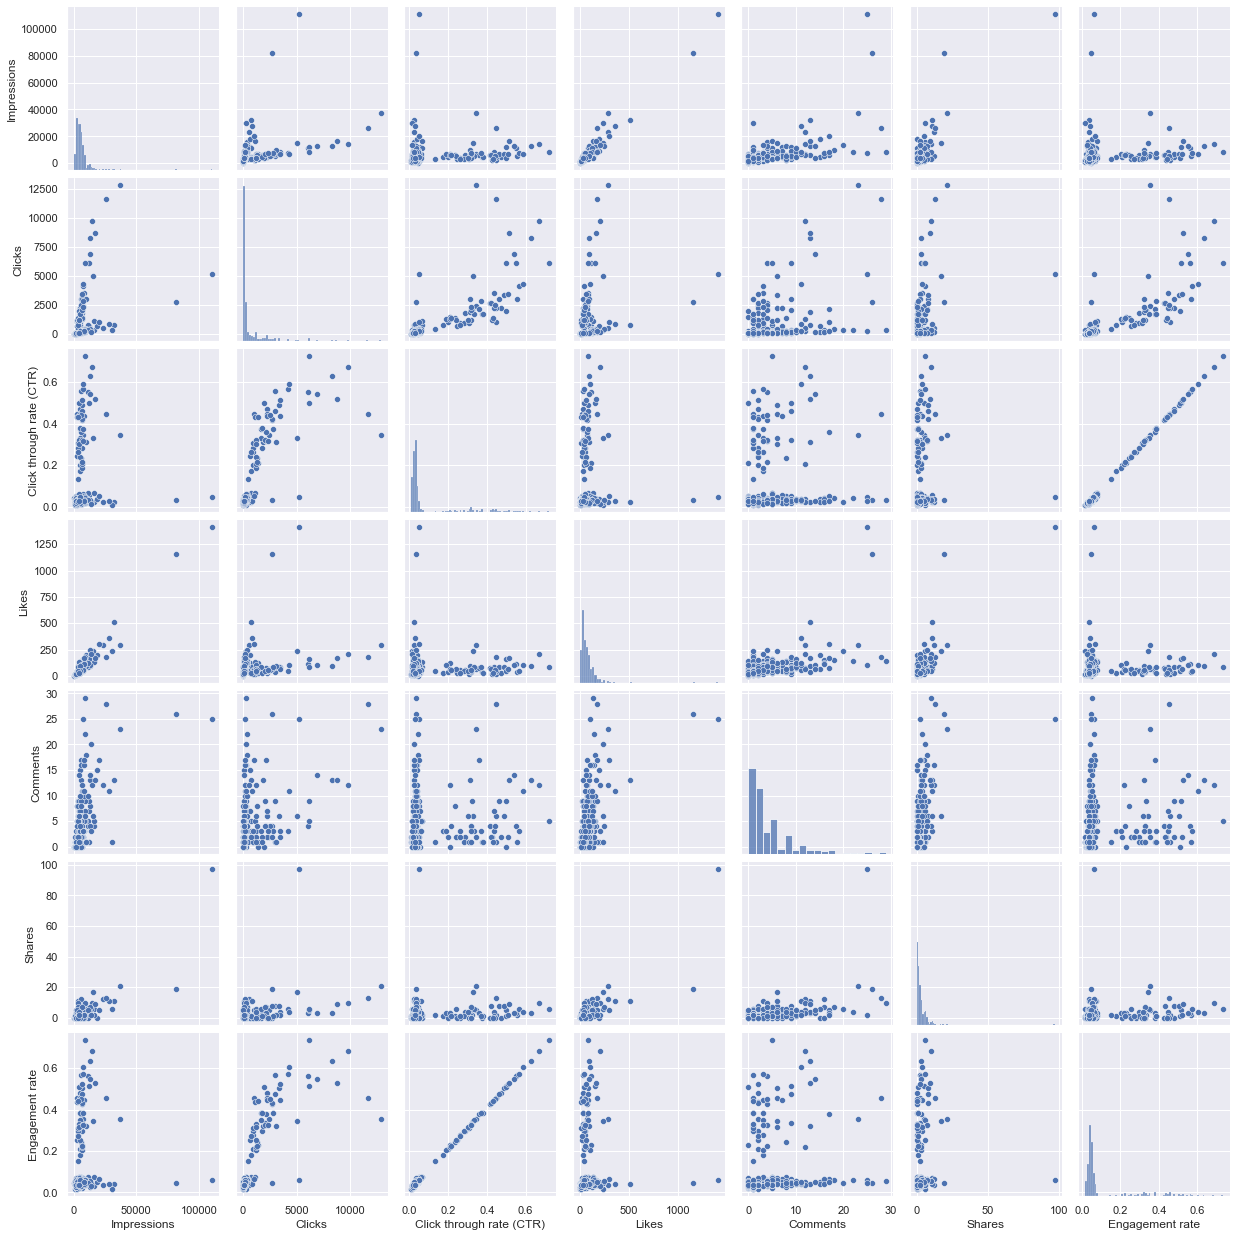

In [32]:
sns.set()
cols = ['Impressions', 'Clicks',
        'Click through rate (CTR)', 'Likes', 'Comments', 'Shares',
        'Engagement rate']
sns.pairplot(df_linkedin[cols], height=2.5)
plt.show()

Let us now 

<AxesSubplot:>

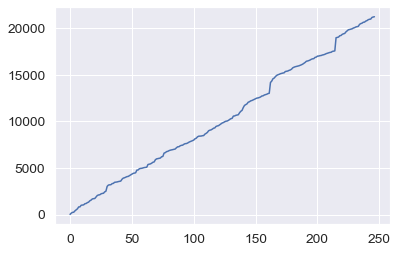

In [26]:
df_linkedin['Cumulative Likes'] = df_linkedin['Likes'].cumsum()
df_linkedin['Cumulative Likes']
df_linkedin['Cumulative Likes'].plot()


Let us now create a video vs not video comparison: 


In [42]:
video = df_linkedin.loc[df_linkedin['Content Type'] ==
                            'Video']
non_video = df_linkedin.loc[df_linkedin['Content Type'] !=
                            'Video']


In [45]:
#Video Table
video.head()

,Update title,Update link,Update type,Created date,Audience,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Shares,Engagement rate,Content Type,Cumulative Likes
2,📢 If you want more women to succeed as tech f...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/19/2021,All followers,6588,253,0.038403,77,12,5,0.052672,Video,236
9,"Imagine turning down a ""ridiculous"" project an...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/31/2021,All followers,11758,418,0.035550,175,1,5,0.050944,Video,1001
28,"""The reality is that most startups don't compe...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,10/01/2021,All followers,15772,357,0.022635,145,4,6,0.032463,Video,2431
30,"""If there was no uncertainty, somebody else wo...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,10/06/2021,All followers,32354,736,0.022748,516,13,11,0.039439,Video,3026
32,"""Your culture, the way that you're onboarding,...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,10/08/2021,All followers,2070,37,0.017874,30,0,1,0.032850,Video,3194


In [46]:
#Non Video Table
non_video.head()

,Update title,Update link,Update type,Created date,Audience,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Shares,Engagement rate,Content Type,Cumulative Likes
0,"""Diversity needs to come with inclusion. You m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/16/2021,All followers,1238,28,0.022617,19,0,1,0.038772,NaN,19
1,⭐️ Latitud Fellow Spotlight\n\nMeet Vinicius ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/18/2021,All followers,5686,287,0.050475,140,8,1,0.076680,NaN,159
3,Tips on how to hire an A+ tech team by Yuri Da...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/20/2021,All followers,2331,1041,0.446589,21,1,1,0.456456,NaN,257
4,“You need to have this ambition and this dream...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/23/2021,All followers,8199,267,0.032565,147,5,6,0.051836,NaN,404
5,Tomorrow’s Latitud Podcast guest has built a c...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,08/25/2021,All followers,6870,348,0.050655,103,9,0,0.066958,NaN,507


Let us get the mean for all desired outcomes

In [53]:
video[['Impressions','Clicks','Likes','Engagement rate','Click through rate (CTR)','Shares']].mean()

Impressions                 9627.454545
Clicks                       319.872727
Likes                        117.727273
Engagement rate                0.044526
Click through rate (CTR)       0.032050
Shares                         2.709091
dtype: float64

In [54]:
non_video[['Impressions','Clicks','Likes','Engagement rate','Click through rate (CTR)','Shares']].mean()

Impressions                 5822.739583
Clicks                      1010.625000
Likes                         76.765625
Engagement rate                0.147338
Click through rate (CTR)       0.132707
Shares                         2.968750
dtype: float64

Interesting Data! We see that Impressions are almost double in video formats, Likes are 50% higher, but engagement and clicks are much lower!